In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data and cleaning the dataset

In [13]:
content = pd.read_csv('./data/content.csv')
content.head()

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [5]:
reactions = pd.read_csv('./data/Reactions.csv')
reactions.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [6]:
reaction_types=pd.read_csv('./data/ReactionTypes.csv')
reaction_types.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [16]:
# drop the columns that are not needed
content = content.drop(['Unnamed: 0','User ID','Type','URL'], axis=1)
content.head()

,Content ID,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,food


In [17]:
reaction_types = reaction_types.drop(['Unnamed: 0'], axis=1)
reaction_types.head()

,Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


In [18]:
reactions = reactions.drop(['Unnamed: 0','Datetime','User ID'], axis=1)
reactions.head()

,Content ID,Type
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust


In [27]:
reactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25553 entries, 0 to 25552
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  25553 non-null  object
 1   Type        24573 non-null  object
dtypes: object(2)
memory usage: 399.4+ KB


In [28]:
reaction_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Type       16 non-null     object
 1   Sentiment  16 non-null     object
 2   Score      16 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 516.0+ bytes


In [29]:
content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  1000 non-null   object
 1   Category    1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [30]:
# removing null rows
reactions = reactions.dropna()

In [42]:
reactions.dtypes

Content ID    object
Type          object
dtype: object

In [41]:
reaction_types.dtypes

Type         object
Sentiment    object
Score         int64
dtype: object

In [43]:
content.dtypes

Content ID    object
Category      object
dtype: object

<Axes: xlabel='Type'>

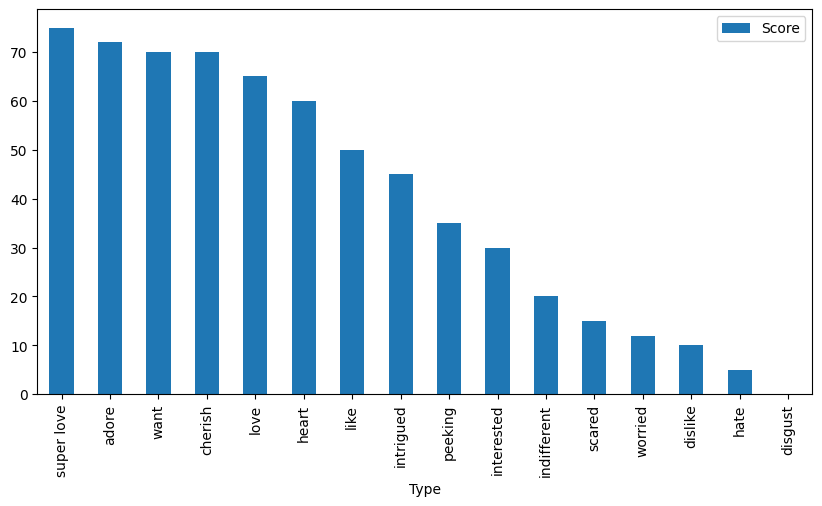

In [48]:
reaction_types.sort_values(by='Score',ascending=False).plot(kind='bar',x='Type',y='Score',figsize=(10,5))

In [49]:
df_temp = pd.merge(content,reactions,on='Content ID',how='inner')
final_df = pd.merge(df_temp,reaction_types,on='Type',how='inner')

In [50]:
final_df.head()

,Content ID,Category,Type,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,Studying,disgust,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,Studying,disgust,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,Studying,disgust,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,healthy eating,disgust,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,healthy eating,disgust,negative,0


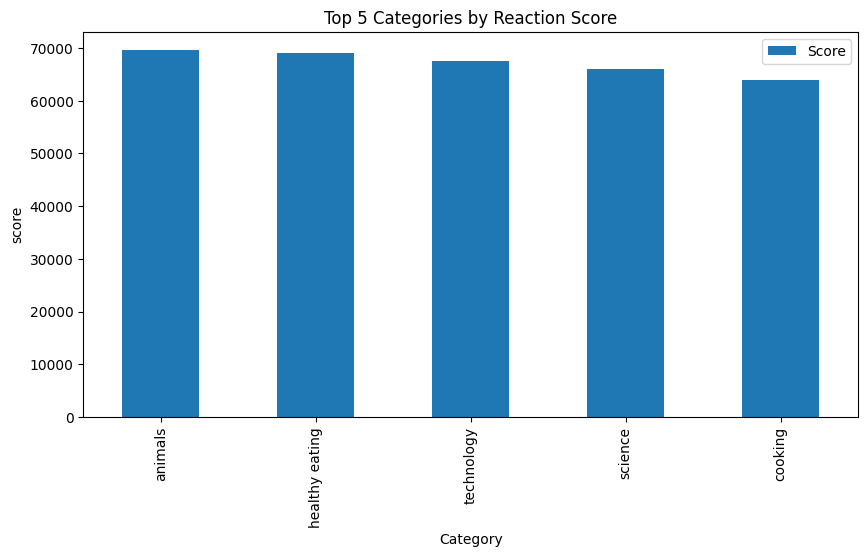

In [57]:
final_df.groupby('Category').agg({'Score':'sum'}).sort_values(by='Score',ascending=False).head(5).plot(kind='bar',figsize=(10,5))
plt.ylabel('score')
plt.title('Top 5 Categories by Reaction Score')
plt.show()

In [59]:
final_df.groupby('Category').agg({'Score':'sum'}).sort_values(by='Score',ascending=False).head(5).reset_index()

,Category,Score
0,animals,69548
1,healthy eating,69067
2,technology,67472
3,science,66043
4,cooking,63982


In [56]:
final_df.to_excel('./data/cleaned_data.xlsx',index=False)

# Alternate data

In [68]:
content1 = pd.read_csv('./data/Content.csv')
reactions1 = pd.read_csv('./data/Reactions.csv')
reaction_types1 = pd.read_csv('./data/ReactionTypes.csv')

In [69]:
content1 = content1.drop(['Unnamed: 0','Type','URL'], axis=1)
reactions1 = reactions1.drop(['Unnamed: 0','User ID'], axis=1)
reaction_types1 = reaction_types1.drop(['Unnamed: 0'], axis=1)

In [70]:
reactions1 = reactions1.dropna()

In [71]:
df_temp1 = pd.merge(content1,reactions1,on='Content ID',how='inner')
final_df1 = pd.merge(df_temp1, reaction_types1, on="Type", how="inner")

In [72]:
final_df1.head()

,Content ID,User ID,Category,Type,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,Studying,disgust,2020-11-07 09:43:50,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,Studying,disgust,2021-01-06 19:13:01,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,Studying,disgust,2021-04-09 02:46:20,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,healthy eating,disgust,2021-03-28 21:15:26,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,healthy eating,disgust,2020-08-04 05:40:33,negative,0


In [74]:
final_df1['Datetime'] = final_df1['Datetime'].astype(str)
final_df1['Datetime'].dtype


dtype('O')

In [75]:
dic={'01':'Jan','02':'Feb','03':'Mar','04':'Apr','05':'May','06':'Jun','07':'Jul','08':'Aug','09':'Sep','10':'Oct','11':'Nov','12':'Dec'}
def extract_month(obj):
    date = obj.split(' ')[0]
    month=date.split('-')[1]
    return dic[month]

In [76]:
final_df1['Month'] = final_df1['Datetime'].apply(extract_month)
final_df1.head()

,Content ID,User ID,Category,Type,Datetime,Sentiment,Score,Month
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,Studying,disgust,2020-11-07 09:43:50,negative,0,Nov
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,Studying,disgust,2021-01-06 19:13:01,negative,0,Jan
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,Studying,disgust,2021-04-09 02:46:20,negative,0,Apr
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,healthy eating,disgust,2021-03-28 21:15:26,negative,0,Mar
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,healthy eating,disgust,2020-08-04 05:40:33,negative,0,Aug


In [77]:
def extract_year(obj):
    date = obj.split(' ')[0]
    return date.split('-')[0]
final_df1['Year'] = final_df1['Datetime'].apply(extract_year)

In [78]:
final_df1.head()

,Content ID,User ID,Category,Type,Datetime,Sentiment,Score,Month,Year
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,Studying,disgust,2020-11-07 09:43:50,negative,0,Nov,2020
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,Studying,disgust,2021-01-06 19:13:01,negative,0,Jan,2021
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,Studying,disgust,2021-04-09 02:46:20,negative,0,Apr,2021
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,healthy eating,disgust,2021-03-28 21:15:26,negative,0,Mar,2021
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,healthy eating,disgust,2020-08-04 05:40:33,negative,0,Aug,2020


In [79]:
final_df1.to_excel('./data/cleaned_data1.xlsx',index=False)

In [81]:
lst =final_df1['Category'].unique()

In [82]:
len(lst)

40

<Axes: xlabel='Category'>

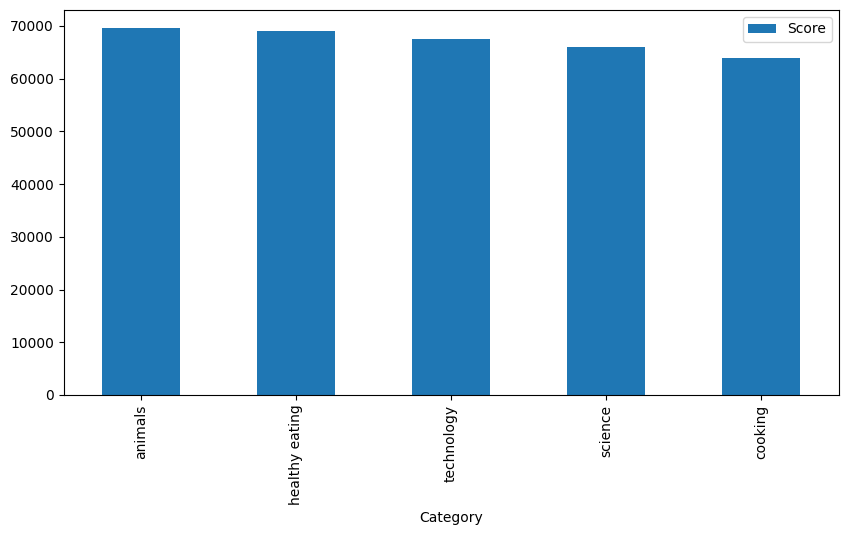

In [83]:
final_df1.groupby('Category').agg({'Score':'sum'}).sort_values(by='Score',ascending=False).head(5).plot(kind='bar',figsize=(10,5))

In [84]:
final_df1[final_df1['Category']=='Animals']

,Content ID,User ID,Category,Type,Datetime,Sentiment,Score,Month,Year
328,429632b9-88c0-4163-a7ed-4272a04f7838,56b8948a-68bd-425f-b842-eabe6bcfacca,Animals,disgust,2021-03-11 18:34:59,negative,0,Mar,2021
329,429632b9-88c0-4163-a7ed-4272a04f7838,56b8948a-68bd-425f-b842-eabe6bcfacca,Animals,disgust,2021-01-27 05:17:52,negative,0,Jan,2021
635,4b00c81e-66dd-45bd-9fb5-a9d2b37b62bf,b0c22f82-b882-4394-bf27-6dfadf26e5c2,Animals,disgust,2021-04-17 21:16:00,negative,0,Apr,2021
636,4b00c81e-66dd-45bd-9fb5-a9d2b37b62bf,b0c22f82-b882-4394-bf27-6dfadf26e5c2,Animals,disgust,2021-03-31 20:46:14,negative,0,Mar,2021
741,76898916-4024-4c32-909b-dd240879d76a,24789387-968b-425a-8836-14e243cda16c,Animals,disgust,2021-06-04 09:11:23,negative,0,Jun,2021
...,...,...,...,...,...,...,...,...,...
23686,4b00c81e-66dd-45bd-9fb5-a9d2b37b62bf,b0c22f82-b882-4394-bf27-6dfadf26e5c2,Animals,adore,2020-09-21 19:15:04,positive,72,Sep,2020
23687,4b00c81e-66dd-45bd-9fb5-a9d2b37b62bf,b0c22f82-b882-4394-bf27-6dfadf26e5c2,Animals,adore,2020-09-23 19:26:43,positive,72,Sep,2020
23688,4b00c81e-66dd-45bd-9fb5-a9d2b37b62bf,b0c22f82-b882-4394-bf27-6dfadf26e5c2,Animals,adore,2020-08-02 09:23:42,positive,72,Aug,2020
23804,76898916-4024-4c32-909b-dd240879d76a,24789387-968b-425a-8836-14e243cda16c,Animals,adore,2021-04-27 01:37:46,positive,72,Apr,2021


In [85]:
final_df1.head()

,Content ID,User ID,Category,Type,Datetime,Sentiment,Score,Month,Year
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,Studying,disgust,2020-11-07 09:43:50,negative,0,Nov,2020
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,Studying,disgust,2021-01-06 19:13:01,negative,0,Jan,2021
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,Studying,disgust,2021-04-09 02:46:20,negative,0,Apr,2021
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,healthy eating,disgust,2021-03-28 21:15:26,negative,0,Mar,2021
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,healthy eating,disgust,2020-08-04 05:40:33,negative,0,Aug,2020


In [86]:
final_df1.shape

(24573, 9)

In [87]:
final_df1 = final_df1.drop_duplicates()
final_df1.shape

(24573, 9)